Prevention is better than Cure?
# Predicting who will get the flu shot
### Business Problem
#### As the world struggles to vaccinate the global population against COVID-19, an understanding of how people’s backgrounds, opinions, and health behaviors are related to their personal vaccination patterns can provide guidance for future public health efforts. This challenge: can you predict whether people got H1N1 and seasonal flu vaccines using data collected in the National 2009 H1N1 Flu Survey? 

### Business Understanding 
Understanding the behaviors that influence vaccination decisions is critical for designing effective public health interventions, especially in the face of global health threats like influenza and pandemics such as COVID-19. Vaccination is one of the most powerful tools in preventing infectious diseases, yet uptake remains inconsistent across populations. This inconsistency is often not due to lack of access alone, but also to a complex interplay of individual beliefs, risk perceptions, trust in healthcare systems, and social influences. By studying these behavioral patterns, public health professionals can identify barriers to vaccine acceptance and tailor communication strategies, outreach programs, and policy decisions to address specific concerns and motivations within different communities.

The importance of this model lies in its ability to predict who is likely to receive a seasonal flu vaccine based on behavioral and demographic data. Using data from the 2009 National H1N1 Flu Survey, the model analyzes variables such as health beliefs, preventive behaviors, healthcare access, and socio-demographic characteristics to classify individuals as vaccinated or not. This predictive capability is invaluable for public health planning. For instance, if the model identifies that individuals with low perceived risk or limited health knowledge are less likely to get vaccinated, targeted education campaigns can be developed to address these gaps. Similarly, if certain age groups or income brackets are underrepresented among the vaccinated, resources can be allocated to improve outreach and accessibility in those segments.

Moreover, predictive models like this one enable proactive rather than reactive public health strategies. Instead of waiting for low vaccination rates to manifest in outbreaks, health authorities can use model insights to anticipate and mitigate risks. This is especially crucial in resource-limited settings, where efficient allocation of vaccines and personnel can make a significant difference in outcomes. The model also supports equity in healthcare by highlighting disparities in vaccine uptake, allowing for interventions that ensure vulnerable populations are not left behind.

In the broader context of pandemic preparedness, understanding vaccination behavior through data science empowers decision-makers with evidence-based tools. It bridges the gap between behavioral science and epidemiology, offering a scalable way to monitor and influence public health behavior. As misinformation and vaccine hesitancy continue to challenge global health efforts, models like this provide a scientific foundation for building trust and improving health literacy. Ultimately, this work contributes to a more resilient healthcare system—one that not only responds to disease but anticipates and prevents it through informed, data-driven action.

In [1]:
#Importing necessary libraries for data manipulation, machine learning, model building and evaluation, handling missing data, encoding, scaling etc.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [10]:
#Loading the necessary data sets
flu_df = pd.read_csv ("H1N1_Flu_Vaccines.csv")



Data exploration to understand all the 3 data sets

In [ ]:
#Display the first 5 rows to understand data
flu_df.head(5)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [12]:
flu_df.shape

(26707, 38)

The data has 26,707 rows and 38 colums

In [14]:
flu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

1. there are 23 colums of float data type.  
2. only 3 columns are integer datatype. 
3. 12 colums are object datatype. 


## Data Preparation

### Data cleaning 

In [17]:
#Drop columns not in use

flu_df.drop(columns=["respondent_id", "h1n1_vaccine"])


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,1
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0


In [18]:
#handle duplicates
flu_df.duplicated().sum

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
26702    False
26703    False
26704    False
26705    False
26706    False
Length: 26707, dtype: bool>

There were no duplicate rows in data

In [19]:
#Handle Missing values using imputer
imputer = SimpleImputer(strategy= "most_frequent")

#Apply imputation
flu_df_imputed = pd.DataFrame(imputer.fit_transform(flu_df), columns=flu_df.columns)


Handled missing values by using the most frequent value to fill missing values in the data set

In [20]:
#Handle categorical variables

label_encoders = {}
for column in flu_df_imputed.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    flu_df_imputed[column] = le.fit_transform(flu_df_imputed[column])
    label_encoders[column] = le


This identified all columns with object datatype (12) and applied encoding to them to convert them to numerical values for easier analysis. the information was then store in a dictionary for later use. 

### Exploratory Data Analysis

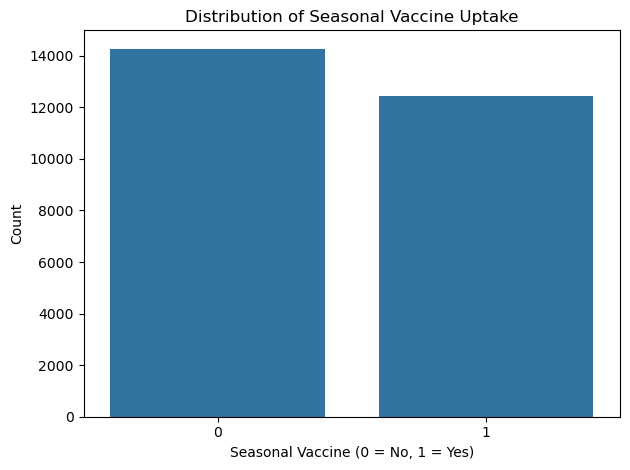

In [21]:
# Analysis of the pattern of uptake of seasonal vaccine

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="seasonal_vaccine", data=flu_df_imputed)
plt.title("Distribution of Seasonal Vaccine Uptake")
plt.xlabel("Seasonal Vaccine (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


This bar chart shows how many people received the seasonal flu vaccine versus those who did not.
It reveals a fairly balanced distribution, with slightly more people not vaccinated.
This helps understand the class balance before modeling.

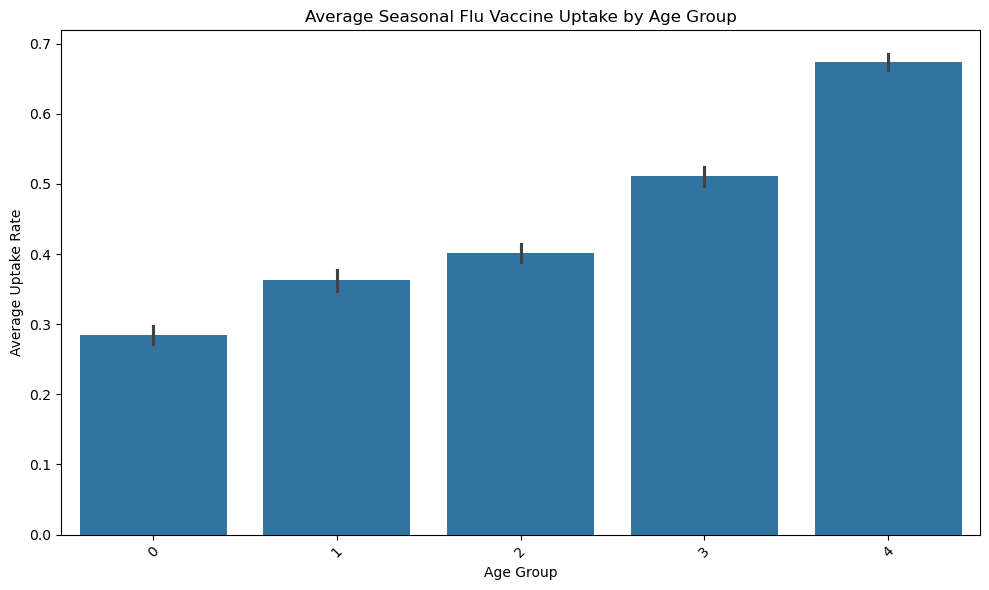

In [22]:
#Analysis of vaccine uptake by age group

plt.figure(figsize=(10, 6))
sns.barplot(
    x="age_group",
    y=flu_df_imputed["seasonal_vaccine"].astype(int),
    data=flu_df_imputed,
    estimator=lambda x: sum(x) / len(x)
)
plt.title("Average Seasonal Flu Vaccine Uptake by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Uptake Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This plot shows the average rate of seasonal flu vaccine uptake across different age groups.
Older age groups tend to have higher vaccination rates compared to younger ones.
This suggests age may be an important predictor in the model.

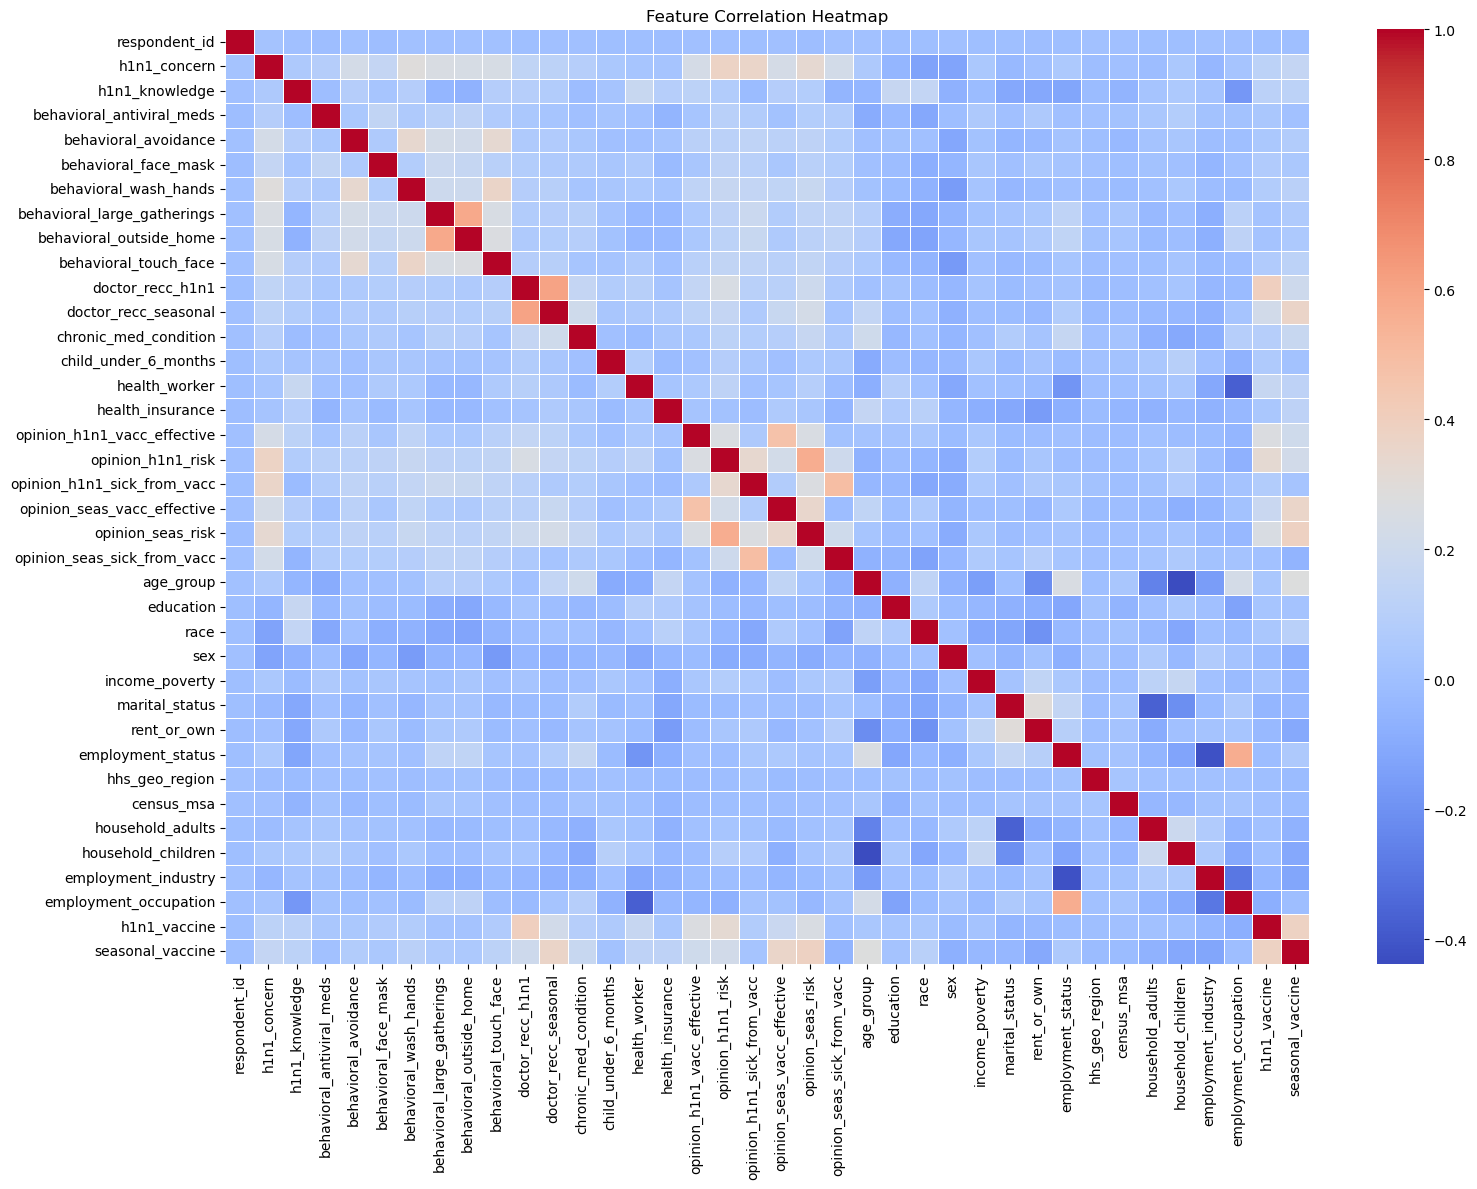

In [23]:
#Correlation analysis 

plt.figure(figsize=(16, 12))
correlation_matrix = flu_df_imputed.corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


The heatmap displays how strongly features are correlated with each other.
Strong correlations (positive or negative) can indicate redundancy or relationships worth exploring.
It helps in feature selection and understanding underlying patterns in the data.